<a href="https://colab.research.google.com/github/GaryPython/Data-science-marathon/blob/main/Titanic/%E4%BD%9C%E6%A5%ADD37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [57]:
data = pd.read_csv("Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##缺失值

In [6]:
missing_vals = data.isnull().sum()/len(data)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
missing_vals

,missing_rate
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [75]:
missing_index=data.isnull()
data[missing_index.values==True]
display(data[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## step1觀察 Age 和 Pclass 與 Sex 是否有關連性?

29.69911764705882
14.526497332334044


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


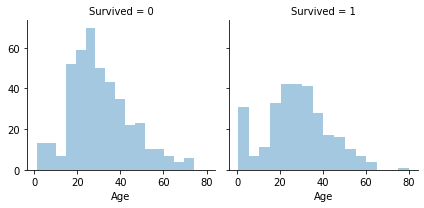

In [69]:
print(data['Age'].mean()) #age平均
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


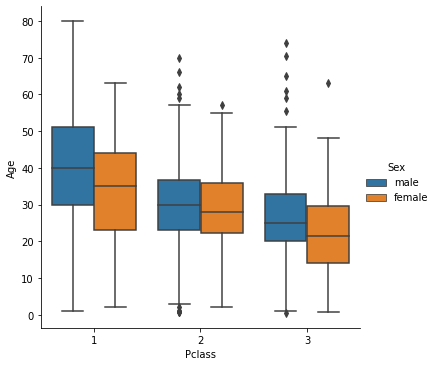

In [12]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",data=data,kind="box")


##男女比例

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


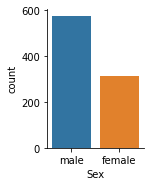

In [18]:
g = sns.catplot("Sex",
                data=data,
                kind="count", height=2.5, aspect=.8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


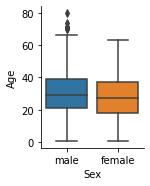

In [22]:
g = sns.catplot("Sex",'Age',
                data=data,
                kind="box", height=2.5, aspect=.8)

## step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass **補** Age 遺失值。 

In [77]:
columns = ["Age", "Pclass", "Sex"]
data_knn = data[columns]
display(data_knn)#all

miss = data_knn.isnull()
display(data_knn[miss.values==True])#age缺失部分

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male
...,...,...,...
886,27.0,2,male
887,19.0,1,female
888,NaN,3,female
889,26.0,1,male


,Age,Pclass,Sex
5,NaN,3,male
17,NaN,2,male
19,NaN,3,female
26,NaN,3,male
28,NaN,3,female
...,...,...,...
859,NaN,3,male
863,NaN,3,female
868,NaN,3,male
878,NaN,3,male


In [27]:
#步驟1.資料型態轉換
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_knn['Sex']=le.fit_transform(data＿knn['Sex'])
display(data_knn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


In [29]:
#步驟2.計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances

#print(pd.DataFrame(nan_euclidean_distances(data＿knn)))
display(pd.DataFrame(nan_euclidean_distances(data_knn)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,18.027756,36.069378,2.000000,17.000000,8.062258,33.030289,20.000000,1.224745,9.055385,1.224745,13.038405,12.041595,7.071068,6.324555,14.035669,16.031220,0.000000,3.605551,1.224745,0.000000,18.110770,2.738613,1.224745,44.011362,6.324555,20.099751,0.000000,1.000000,4.123106,8.062258,...,52.000000,13.038405,6.403124,22.045408,4.123106,23.108440,29.068884,2.236068,0.000000,19.000000,1.414214,26.095977,1.224745,2.236068,20.049938,5.196152,9.219544,0.000000,18.000000,4.000000,25.099801,11.180340,25.000000,6.164414,7.071068,2.000000,3.000000,0.000000,34.073450,3.316625,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,34.058773,20.000000,18.138357,2.449490,24.083189,17.029386,36.069378,1.732051,7.280110,2.449490,3.316625,4.242641,23.086793,10.049876,30.066593,2.000000,2.738613,19.026298,2.449490,2.738613,2.236068,0.000000,2.449490,28.035692,10.049876,4.123106,2.738613,17.146428,20.099751,24.083189,...,36.069378,29.068884,22.000000,6.082763,20.099751,7.000000,13.038405,14.142136,2.738613,3.741657,17.058722,10.000000,2.449490,14.071247,4.123106,11.045361,7.071068,2.738613,34.073450,12.206556,9.000000,5.099020,9.273618,10.049876,23.086793,18.138357,19.131126,2.738613,18.000000,13.038405,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,22.000000,32.062439,6.082763,13.038405,12.000000,29.017236,24.020824,1.732051,5.000000,0.000000,9.110434,8.124038,11.000000,3.000000,18.000000,12.000000,1.224745,7.348469,0.000000,1.224745,14.177447,2.449490,0.000000,40.024992,3.000000,16.155494,1.224745,5.099020,8.000000,12.000000,...,48.010416,17.000000,10.198039,18.027756,8.000000,19.104973,25.099801,2.000000,1.224745,15.033296,5.196152,22.090722,0.000000,2.449490,16.031220,1.414214,5.477226,1.224745,22.022716,1.000000,21.095023,7.348469,21.023796,2.236068,11.000000,6.082763,7.071068,1.224745,30.066593,1.414214,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,31.064449,23.000000,15.165751,4.582576,21.095023,20.024984,33.075671,1.732051,4.472136,2.449490,1.414214,1.732051,20.099751,7.071068,27.073973,3.605551,2.738613,16.031220,2.449490,2.738613,5.099020,0.000000,2.449490,31.032241,7.071068,7.071068,2.738613,14.177447,17.117243,21.095023,...,39.064050,26.076810,19.000000,9.055385,17.117243,10.000000,16.031220,11.180340,2.738613,6.403124,14.071247,13.000000,2.449490,11.090537,7.071068,8.062258,4.123106,2.738613,31.080541,9.273618,12.000000,2.236068,12.206556,7.071068,20.099751,15.165751,16.155494,2.738613,21.000000,10.049876,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,31.016125,23.108440,15.000000,4.000000,21.023796,20.049938,33.000000,1.224745,4.123106,1.224745,1.000000,1.414214,20.024984,7.280110,27.018512,3.162278,0.000000,16.124515,1.224745,0.000000,5.385165,2.738613,1.224745,31.016125,7.280110,7.280110,0.000000,14.000000,17.029386,21.023796,...,39.000000,26.019224,19.131126,9.110434,17.029386,10.246951,16.124515,11.045361,0.000000,6.000000,14.035669,13.190906,1.224745,11.045361,7.141428,8.124038,4.472136,0.000000,31.000000,9.000000,12.206556,2.828427,12.000000,7.141428,20.024984,15.000000,16.000000,0.000000,21.118712,10.099505,2.

In [36]:
display(data_knn)


,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


In [66]:
#步驟3: 透過 KNN 進行補值
#K=3,weights= uniform
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data_knn))

display(df_filled)
'''
補充
更改名字
df_filled_rename = df_filled.rename(columns={0:'sex',1:'age',2:'height'})
display(df_filled_rename)
'''

,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,19.0,3.0,0.0
889,26.0,1.0,1.0


"\n更改名字\ndf_filled_rename = df_filled.rename(columns={0:'sex',1:'age',2:'height'})\ndisplay(df_filled_rename)\n"

In [44]:
#K=3,weights= distance

value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled_distance = pd.DataFrame(imputer.fit_transform(data_knn))

display(df_filled_distance)

,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,19.0,3.0,0.0
889,26.0,1.0,1.0


##確認缺失值以補齊

In [58]:
#old data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
#new data
data[columns]  = df_filled
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1.0,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,19.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1.0,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,C148,C


In [49]:
missing_vals_sex = data.isnull().sum()/len(data)
missing_vals_sex
#以補齊“Age”的缺失值

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 判斷補值的好壞?
可以運用模型預測準確度的指標，來判斷補值的好壞
* MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷，
MSE 越小代表補值的準確度越高。
還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。

* Step1:取無遺失值的資料集
* Step2:隨機取幾個資料點，當作遺失值
* Step3:以step2產生的遺失值進行補值，
* Step4: 計算MSE看補值的效果。